In [8]:
!pip install torch torchvision
!git clone https://github.com/ultralytics/yolov5.git
!cd yolov5 && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Cloning into 'yolov5'...
remote: Enumerating objects: 17413, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 17413 (delta 64), reused 22 (delta 22), pack-reused 17327 (from 4)
Receiving objects: 100% (17413/17413), 16.31 MiB | 24.93 MiB/s, done.
Resolving deltas: 100% (11932/11932), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.8 MB/s eta 0:00:00


100%|██████████| 6.25M/6.25M [00:00<00:00, 257MB/s]



0: 448x640 10 persons, 8 cars, 2 motorcycles, 5 buss, 6 trucks, 315.9ms
Speed: 6.2ms preprocess, 315.9ms inference, 5.9ms postprocess per image at shape (1, 3, 448, 640)


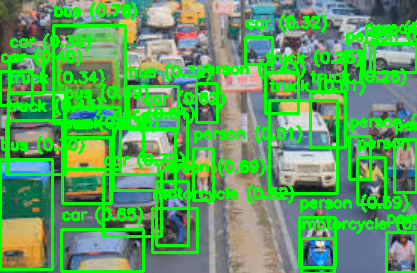

In [4]:
import cv2
import torch
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model (Pretrained on COCO dataset)
model = YOLO("yolov8n.pt")  # You can use 'yolov8s.pt' for a larger model

# Load an image
image_path = "a.png"  # Change this to your image path
image = cv2.imread(image_path)

# Perform inference
results = model(image)

# Process results
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        confidence = box.conf[0].item()  # Confidence score
        class_id = int(box.cls[0])  # Class ID
        label = model.names[class_id]  # Get class label

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} ({confidence:.2f})", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the output
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()